In [1]:
import pandas as pd 
df = pd.read_csv("/kaggle/input/all-banking-app-reviews-12-may-2025/all_banking_app_reviews.csv")

In [2]:
df.head()

,review_text,sentiment,review_time,rating,app_name
0,not good not bad,Negative,2025-04-09 3:08:43,5,Agrani Smart Banking App
1,nice,Positive,2025-04-06 3:26:31,5,Agrani Smart Banking App
2,really helpful app nice working,Positive,2025-04-02 19:45:17,4,Agrani Smart Banking App
3,good,Positive,2025-03-27 17:46:04,5,Agrani Smart Banking App
4,good.. job...,Positive,2025-03-27 7:57:25,3,Agrani Smart Banking App


# Text Preprocessing

# 1. Text Cleaning

In [3]:
import re

def clean_text(text):
    text = str(text).strip().lower()                        # Convert to lowercase, remove leading/trailing spaces

    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # Preserve the last full stop if it's there
    ends_with_period = text.endswith('.')
    
    # Replace . , | । with space
    text = re.sub(r'[.,|।]', ' ', text)

    # If the original text ended with '.', add it back
    if ends_with_period:
        text = text.rstrip() + '.'

    # Remove unwanted characters, keep Bangla + English letters/numbers
    text = re.sub(r'[^\w\s\u0980-\u09FF]', '', text)

    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [4]:
df['cleaned_review'] = df['review_text'].apply(clean_text)

In [5]:
df

,review_text,sentiment,review_time,rating,app_name,cleaned_review
0,not good not bad,Negative,2025-04-09 3:08:43,5,Agrani Smart Banking App,not good not bad
1,nice,Positive,2025-04-06 3:26:31,5,Agrani Smart Banking App,nice
2,really helpful app nice working,Positive,2025-04-02 19:45:17,4,Agrani Smart Banking App,really helpful app nice working
3,good,Positive,2025-03-27 17:46:04,5,Agrani Smart Banking App,good
4,good.. job...,Positive,2025-03-27 7:57:25,3,Agrani Smart Banking App,good job
...,...,...,...,...,...,...
78176,it's not working,NaN,2017-04-21 12:13:26,1,AB Direct Internet Banking,its not working
78177,This app is not working properly,NaN,2017-04-21 5:06:10,2,AB Direct Internet Banking,this app is not working properly
78178,Most powerful and highly secured banking system.,NaN,2017-04-02 11:10:34,5,AB Direct Internet Banking,most powerful and highly secured banking system
78179,This apps is very much useful now a days. Than...,NaN,2017-04-02 9:33:30,5,AB Direct Internet Banking,this apps is very much useful now a days thank...


# 2. Tokenization

In [6]:
import nltk
from nltk.tokenize import word_tokenize

# Download tokenizer models
nltk.download('punkt')

# Function to tokenize Bangla-English mixed text
def tokenize_mixed(text):
    if pd.isnull(text):
        return []
    return word_tokenize(text)

df['tokens'] = df['cleaned_review'].apply(tokenize_mixed)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
df[['cleaned_review', 'tokens']]

,cleaned_review,tokens
0,not good not bad,"[not, good, not, bad]"
1,nice,[nice]
2,really helpful app nice working,"[really, helpful, app, nice, working]"
3,good,[good]
4,good job,"[good, job]"
...,...,...
78176,its not working,"[its, not, working]"
78177,this app is not working properly,"[this, app, is, not, working, properly]"
78178,most powerful and highly secured banking system,"[most, powerful, and, highly, secured, banking..."
78179,this apps is very much useful now a days thank...,"[this, apps, is, very, much, useful, now, a, d..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78181 entries, 0 to 78180
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_text     78176 non-null  object
 1   sentiment       1619 non-null   object
 2   review_time     78181 non-null  object
 3   rating          78181 non-null  int64 
 4   app_name        78181 non-null  object
 5   cleaned_review  78181 non-null  object
 6   tokens          78181 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.2+ MB


# 3. Stopwords Removal

In [9]:
custom_english_stopwords = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself",
    "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
    "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be",
    "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during", "before",
    "after", "above", "below", "to", "from", "up", "down", "on", "off", "over",
    "under", "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such",
    "only", "own", "same", "so", "than", "too", "very", "can", "will", "just", "should", "now", "o"
]

In [10]:
custom_bengali_stopwords = [
    "আমি", "আমরা", "তুমি", "তোমরা", "সে", "তারা", "এটা", "ওটা", "এই", "সেই", "কে", 
    "কাকে", "কোথায়", "কখন", "কবে", "যখন", "তখন", "যদি", "যদিও", "আর", "এবং", "অথবা", 
    "কিন্তু", "যেন", "যেমন", "তাই", "তো", "হ্যাঁ", "ছিল", "ছিলাম", "হয়", "হবে", 
    "কর", "করেছে", "করা", "করি", "করছেন", "করার", "করা হয়", "করছেন", "করো", "করলাম", 
    "একটি", "এক", "কিছু", "অনেক", "সব", "শুধু", "তবে", "আরও", "যিনি", "যার", "যারাও", 
    "হলো", "হয়ে", "তাকে", "তাদের", "এটি", "ওটি", "ইত্যাদি", "তারপর", "উপর", "নিচে", 
    "থেকে", "জন্য", "সঙ্গে", "মধ্যে", "দিকে", "দুবাই", "লক্ষ্য", "এইটা", "কোন"
]

In [11]:
# Combine and lowercase for comparison
all_stopwords = set(word.lower() for word in (custom_english_stopwords + custom_bengali_stopwords))

# Function to remove stopwords from token list
def remove_stopwords_from_tokens(tokens):
    return [token for token in tokens if token.lower() not in all_stopwords]

# Apply to token column
df['filtered_tokens'] = df['tokens'].apply(remove_stopwords_from_tokens)

In [12]:
df[['tokens', 'filtered_tokens']]

,tokens,filtered_tokens
0,"[not, good, not, bad]","[not, good, not, bad]"
1,[nice],[nice]
2,"[really, helpful, app, nice, working]","[really, helpful, app, nice, working]"
3,[good],[good]
4,"[good, job]","[good, job]"
...,...,...
78176,"[its, not, working]","[not, working]"
78177,"[this, app, is, not, working, properly]","[app, not, working, properly]"
78178,"[most, powerful, and, highly, secured, banking...","[powerful, highly, secured, banking, system]"
78179,"[this, apps, is, very, much, useful, now, a, d...","[apps, much, useful, days, thanks, ab, making,..."


# 4. Lemmatization for Only English Reviews

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
import re

# Download required resources
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the English lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to detect if text is mostly English
def is_english(tokens):
    english_chars = sum(1 for token in tokens for char in token if 'a' <= char.lower() <= 'z')
    bangla_chars = sum(1 for token in tokens for char in token if '\u0980' <= char <= '\u09FF')
    return english_chars >= bangla_chars

# Function to apply lemmatization only if English
def lemmatize_if_english(tokens):
    if is_english(tokens):
        return [lemmatizer.lemmatize(token) for token in tokens]
    else:
        return tokens

# Apply the function
df['lemmatized'] = df['filtered_tokens'].apply(lemmatize_if_english)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [14]:
df[['filtered_tokens', 'lemmatized']].head(100)

,filtered_tokens,lemmatized
0,"[not, good, not, bad]","[not, good, not, bad]"
1,[nice],[nice]
2,"[really, helpful, app, nice, working]","[really, helpful, app, nice, working]"
3,[good],[good]
4,"[good, job]","[good, job]"
...,...,...
95,"[good, app, realy, happy, use, app]","[good, app, realy, happy, use, app]"
96,"[বিদেশ, গিয়ে, অ্যাপ, চালানোর, সুবিধা, চাই]","[বিদেশ, গিয়ে, অ্যাপ, চালানোর, সুবিধা, চাই]"
97,"[useful, great, application, time, temporarily...","[useful, great, application, time, temporarily..."
98,"[agrani, smart, app, beautiful, app]","[agrani, smart, app, beautiful, app]"


# Detect Language Type (Bangla, English, Mixed)

In [15]:
import re

def detect_language_type(text):
    bangla_regex = r'[\u0980-\u09FF]'
    english_regex = r'[a-zA-Z]'

    has_bangla = bool(re.search(bangla_regex, text))
    has_english = bool(re.search(english_regex, text))

    if has_bangla and has_english:
        return "mixed"
    elif has_bangla:
        return "bangla"
    elif has_english:
        return "english"
    else:
        return "unknown"

df['lang_type'] = df['review_text'].astype(str).apply(detect_language_type)

In [16]:
df['lang_type'].value_counts()

lang_type
english    71397
bangla      4846
mixed       1458
unknown      480
Name: count, dtype: int64

In [17]:
df.head()

,review_text,sentiment,review_time,rating,app_name,cleaned_review,tokens,filtered_tokens,lemmatized,lang_type
0,not good not bad,Negative,2025-04-09 3:08:43,5,Agrani Smart Banking App,not good not bad,"[not, good, not, bad]","[not, good, not, bad]","[not, good, not, bad]",english
1,nice,Positive,2025-04-06 3:26:31,5,Agrani Smart Banking App,nice,[nice],[nice],[nice],english
2,really helpful app nice working,Positive,2025-04-02 19:45:17,4,Agrani Smart Banking App,really helpful app nice working,"[really, helpful, app, nice, working]","[really, helpful, app, nice, working]","[really, helpful, app, nice, working]",english
3,good,Positive,2025-03-27 17:46:04,5,Agrani Smart Banking App,good,[good],[good],[good],english
4,good.. job...,Positive,2025-03-27 7:57:25,3,Agrani Smart Banking App,good job,"[good, job]","[good, job]","[good, job]",english


In [18]:
df[df['sentiment'].notna()]['lang_type'].value_counts()

lang_type
english    1396
bangla      168
mixed        54
unknown       1
Name: count, dtype: int64

In [19]:
df[df['lang_type'] == 'unknown']

,review_text,sentiment,review_time,rating,app_name,cleaned_review,tokens,filtered_tokens,lemmatized,lang_type
191,👎👎👎👎,Negative,2024-11-04 6:12:09,1,Agrani Smart Banking App,,[],[],[],unknown
513,👍💖💖💖,NaN,2024-01-15 12:53:30,5,Agrani Smart Banking App,,[],[],[],unknown
1182,😍😍😍,NaN,2023-07-15 23:15:00,5,Agrani Smart Banking App,,[],[],[],unknown
1188,🧡🧡🧡🧡🧡,NaN,2023-07-07 8:58:54,5,Agrani Smart Banking App,,[],[],[],unknown
1199,🥰😘😍,NaN,2023-06-25 4:18:44,5,Agrani Smart Banking App,,[],[],[],unknown
...,...,...,...,...,...,...,...,...,...,...
75782,🛰🛸👍,NaN,2023-04-02 20:21:19,1,Bank Asia SMART App,,[],[],[],unknown
75844,♥️,NaN,2023-01-21 15:24:42,5,Bank Asia SMART App,,[],[],[],unknown
75881,🖤🖤,NaN,2022-11-07 14:34:04,3,Bank Asia SMART App,,[],[],[],unknown
76002,😍😍,NaN,2022-05-12 12:05:09,5,Bank Asia SMART App,,[],[],[],unknown


In [20]:
df = df[df['lang_type'] != 'unknown']

In [25]:
df['lang_type'].value_counts()

lang_type
english    71397
bangla      4846
mixed       1458
Name: count, dtype: int64

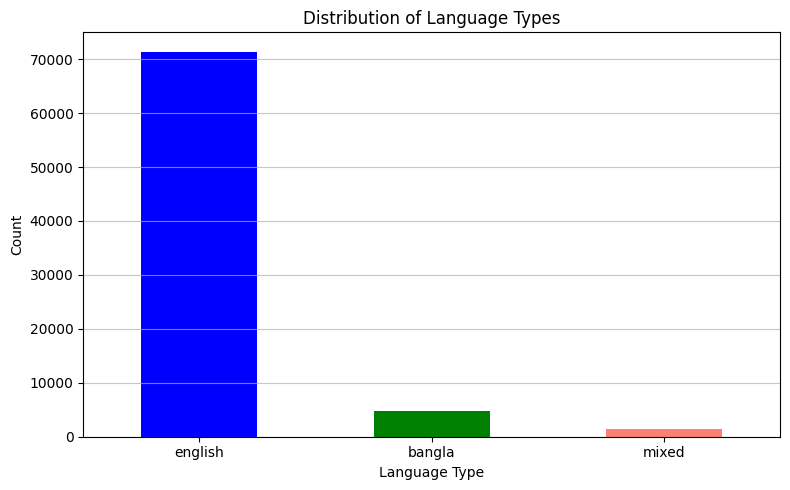

In [30]:
import matplotlib.pyplot as plt

# Value counts
counts = df['lang_type'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color=['blue', 'green', 'salmon'])
plt.title('Distribution of Language Types')
plt.xlabel('Language Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
df[df['sentiment'].notna()]['lang_type'].value_counts()

lang_type
english    1396
bangla      168
mixed        54
Name: count, dtype: int64

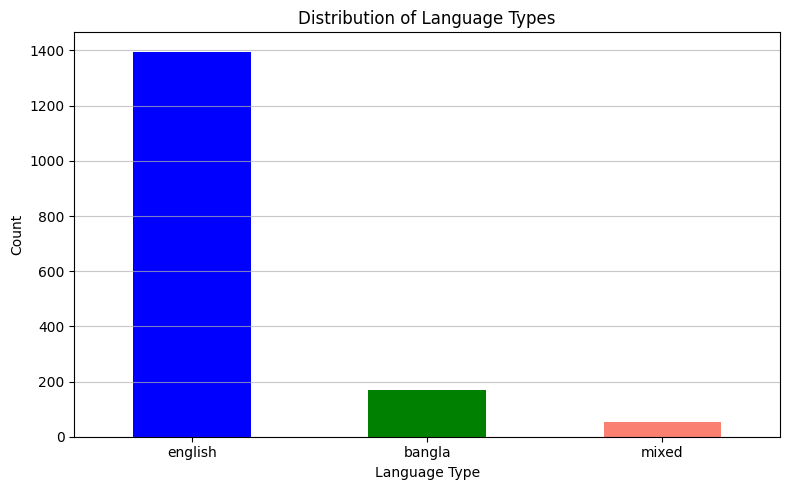

In [32]:
# Value counts
lebel_counts = df[df['sentiment'].notna()]['lang_type'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
lebel_counts.plot(kind='bar', color=['blue', 'green', 'salmon'])
plt.title('Distribution of Language Types')
plt.xlabel('Language Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
labeled_df = df[df['sentiment'].notna()]

In [23]:
import os
df.to_csv('/kaggle/working/spl_preprocessed_reviews_14_may_2025.csv', index=False)
print(os.listdir())

['.virtual_documents', 'spl_preprocessed_reviews_14_may_2025.csv']
